In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [61]:
#load the data
uploaded = pd.read_csv(r"C:\Users\Acer\Desktop\Stock-MArket-Forecasting-master\coin_Bitcoin.csv")

In [62]:
#store the data in the data frame
df = pd.read_csv('coin_Bitcoin.csv')
df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [63]:
#get  the no of trading days
df.shape

(2862, 10)

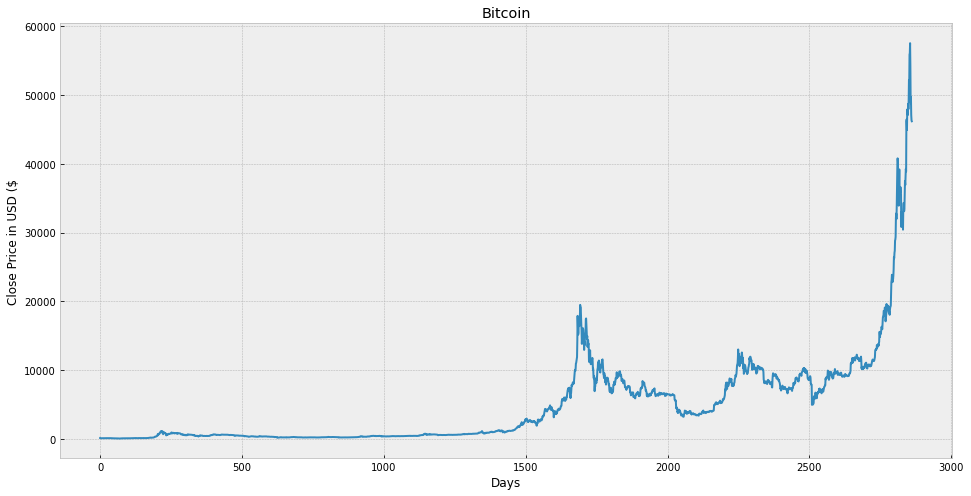

In [64]:
#visualize the close price data
plt.figure(figsize=(16,8))
plt.title('Bitcoin')
plt.xlabel('Days')
plt.ylabel('Close Price in USD ($')
plt.plot(df['Close'])
plt.show()

In [66]:
#get the close price
df = df[['Close']]
df.head(4)

,Close
0,144.539993
1,139.000000
2,116.989998
3,105.209999


In [67]:
#create a variable to predict 'x' days out into the future
future_days = 25
#create a new column (target) shifted 'x' units/days up
df['Prediction'] = df[['Close']].shift(-future_days)
df.head(4)

,Close,Prediction
0,144.539993,133.199997
1,139.000000,131.979996
2,116.989998,133.479996
3,105.209999,129.744995


In [68]:
#create the feature dataset (X) and convert it into a numpy arr and remove the last 'x' rows/days
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(X)

[[  144.53999329]
 [  139.        ]
 [  116.98999786]
 ...
 [33114.35774753]
 [33537.1768196 ]
 [35510.28903716]]


In [69]:
#create the target data set (y) and convert it into numpy array and get the target values except the last 'x' rows
y = np.array(df['Prediction'])[:-future_days]
print(y)

[  133.19999695   131.97999573   133.47999573 ... 47093.85301914
 46339.76008289 46188.45127539]


In [70]:
#split the data 75% training and 25% testing 
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.25)

In [71]:
#create the models
#create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)
#Create the linear regression model 
lr = LinearRegression().fit(x_train, y_train)

In [72]:
#get the last 'x' rows of the feature dataset
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[40254.54649816],
       [38356.43950662],
       [35566.65594049],
       [33922.9605815 ],
       [37316.35939997],
       [39187.32812109],
       [36825.36585131],
       [36178.13890106],
       [35791.27792129],
       [36630.07568284],
       [36069.80639361],
       [35547.7508855 ],
       [30825.69850603],
       [33005.76356216],
       [32067.64288212],
       [32289.37808687],
       [32366.39304887],
       [32569.84955679],
       [30432.54707881],
       [33466.09635821],
       [34316.38765032],
       [34269.52154165],
       [33114.35774753],
       [33537.1768196 ],
       [35510.28903716]])

In [73]:
#show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
#show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[37472.09010368 46196.46371944 38144.30686267 39266.01073494
 33114.35774753 46196.46371944 33114.35774753 44918.18449192
 47909.33119483 33114.35774753 47105.51747252 48717.2902111
 47945.05683234 49199.87134362 52149.00753587 51679.79669449
 55888.13368221 55888.13368221 57539.9436679  54207.31906543
 48824.42686909 48824.42686909 49199.87134362 54207.31906543
 46188.45127539]

[46656.51668506 44442.09356242 41187.3975608  39269.78331369
 43228.68596852 45411.44827657 42655.86922422 41900.78306174
 41449.45239246 42428.03429889 41774.39713592 41165.34201225
 35656.36805977 38199.73705354 37105.28024212 37363.96722167
 37453.81658917 37691.17875979 35197.69865124 38736.78348571
 39728.77429899 39674.09803724 38326.42826544 38819.70937871
 41121.63721397]


<ipython-input-74-9b76afc105a0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction'] = predictions


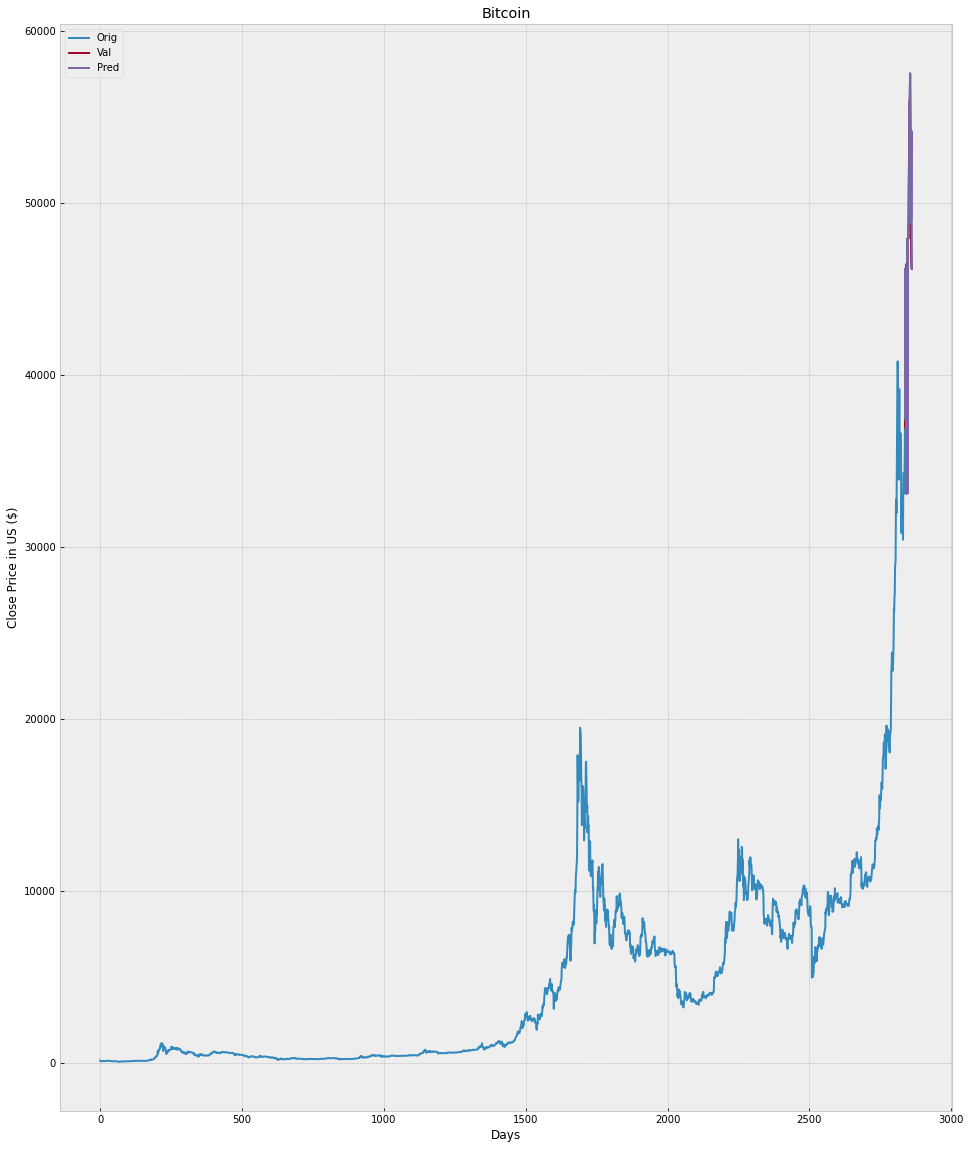

In [74]:
#visualize the data
predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Prediction'] = predictions
plt.figure(figsize=(16,20))
plt.title('Bitcoin')
plt.xlabel('Days')
plt.ylabel('Close Price in US ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close','Prediction']])
plt.legend(['Orig','Val', 'Pred'])
plt.show()